In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
!ls bank-add*

ls: bank-add*: No such file or directory


In [3]:
data = pd.read_csv('../../bank-additional-full.csv', header=0,sep=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.shape

(41188, 21)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### EDA

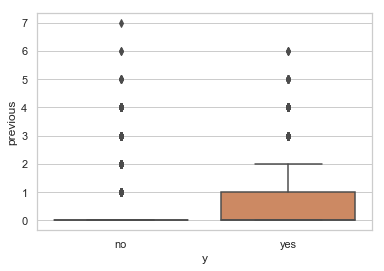

In [10]:
sns.boxplot(x='y',y='previous',data=data)

In [11]:
# remove outliers in dataset

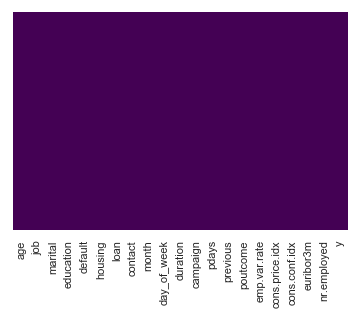

In [12]:
# check for any missing values
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It seems that we do not have any missing values

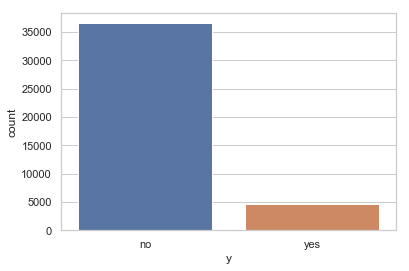

In [13]:
sns.countplot(x='y',data=data)
plt.show()

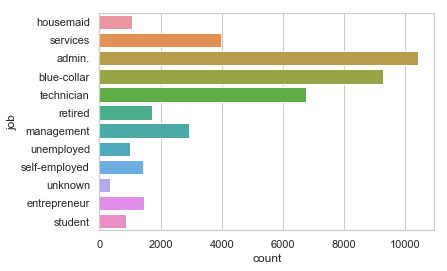

In [14]:
#Customer job description
sns.countplot(y="job", data=data)
plt.show()

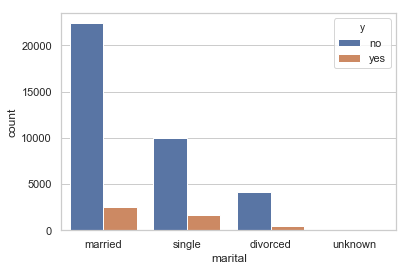

In [15]:
#Customer marital status
sns.countplot(x="marital", data=data,hue='y')

In [16]:
data['marital'][data['marital']=="unknown"]=data['marital'].mode()[0]

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/suniljacob/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


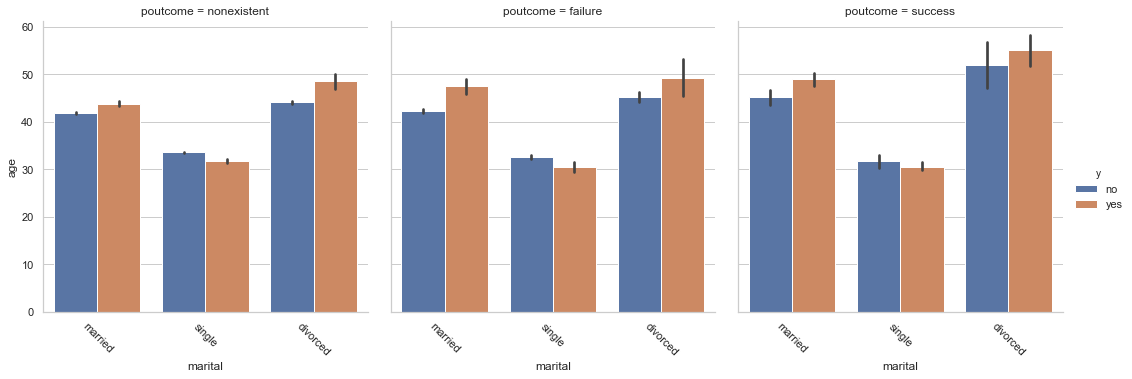

In [17]:
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=data, 
                   hue='y', 
                   col='poutcome',
                  kind = 'bar') 
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

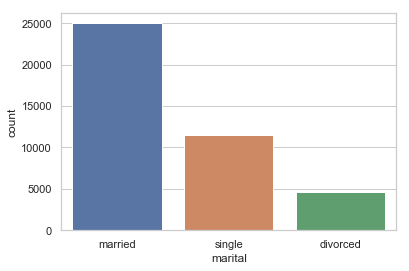

In [18]:
#Customer marital status after imputing values
sns.countplot(x="marital", data=data)

In [19]:
data.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

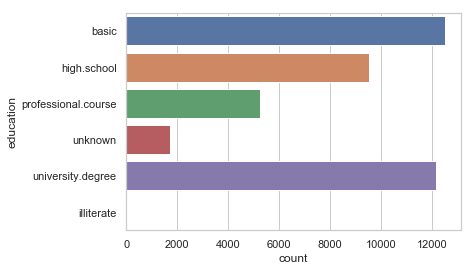

In [20]:
sns.countplot(y='education', data=data)

In [21]:
data['education'][data['education']=="unknown"]=data['education'].mode()[0]

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (data[data['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (data[data['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,4640.000000,36548.000000
mean,2.051724,2.633085
std,1.666245,2.873438
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,23.000000,56.000000


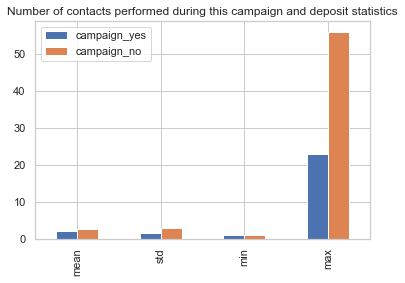

In [23]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

The more the campaign the less the people tend to buy

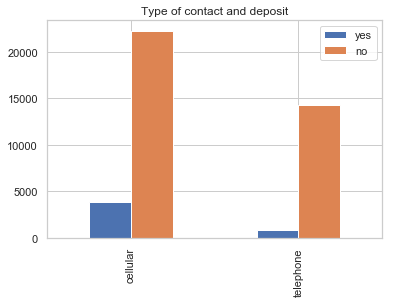

In [24]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
j_df['no'] = data[data['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

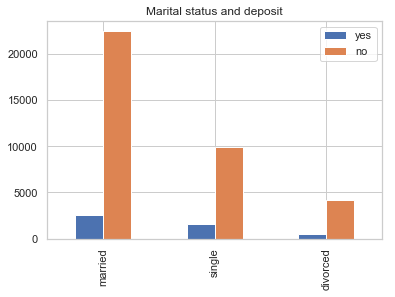

In [25]:
#marital status and deposit
m_df = pd.DataFrame()

m_df['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
m_df['no'] = data[data['y'] == 'no']['marital'].value_counts()

m_df.plot.bar(title = 'Marital status and deposit')

Married customers are less likely to subscribe for term deposit.

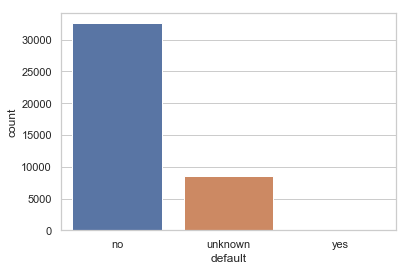

In [26]:
#credit in default
sns.countplot(x="default", data=data)

In [27]:
print(data.default.value_counts())
data['default'][data['default']=="unknown"]=data['default'].mode()[0]
print('-----------------------')
print('After imputing......')
print('----------------------')
print(data.default.value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-----------------------
After imputing......
----------------------
no     41185
yes        3
Name: default, dtype: int64


/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


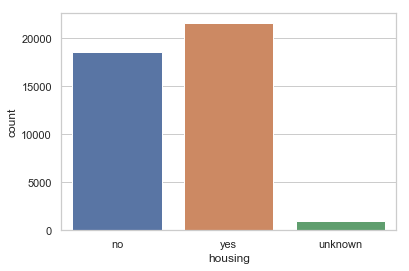

In [28]:
# Housing loan plot
sns.countplot(x="housing", data=data)

In [29]:
print(data.housing.value_counts())
data['housing'][data['housing']=="unknown"]=data['housing'].mode()[0]
print('--------------------------------')
print('After imputing......')
print('--------------------------------')
print(data.housing.value_counts())

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
--------------------------------
After imputing......
--------------------------------
yes    22566
no     18622
Name: housing, dtype: int64

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


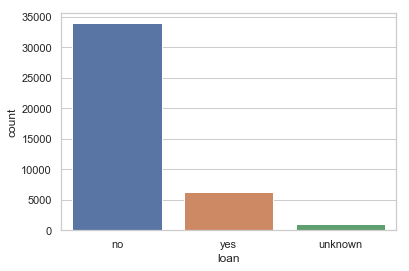

In [30]:
# plot for personal loan
sns.countplot(x="loan", data=data)

In [31]:
data['loan'][data['loan']=="unknown"]=data['loan'].mode()[0]


/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


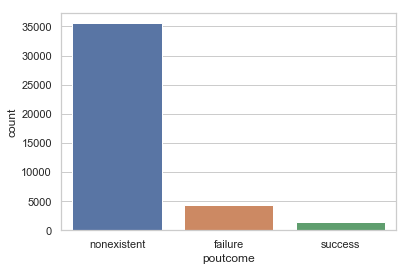

In [32]:
# previous marketing campaign outcome
sns.countplot(x="poutcome", data=data)

There seems to be lot of unknown values in some of the attributes. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

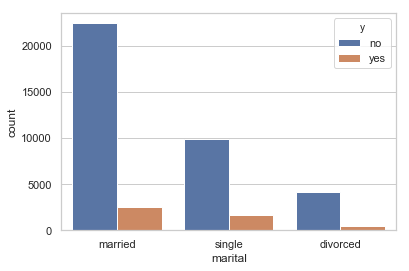

In [33]:
sns.countplot(x='marital',data=data,hue='y')

### Pre Processing

Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [34]:
le = preprocessing.LabelEncoder()

In [35]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [36]:
from sklearn.pipeline import Pipeline
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['job','marital','education','housing','loan','poutcome','y']))
    # add more pipeline steps as needed
])
data = encoding_pipeline.fit_transform(data)

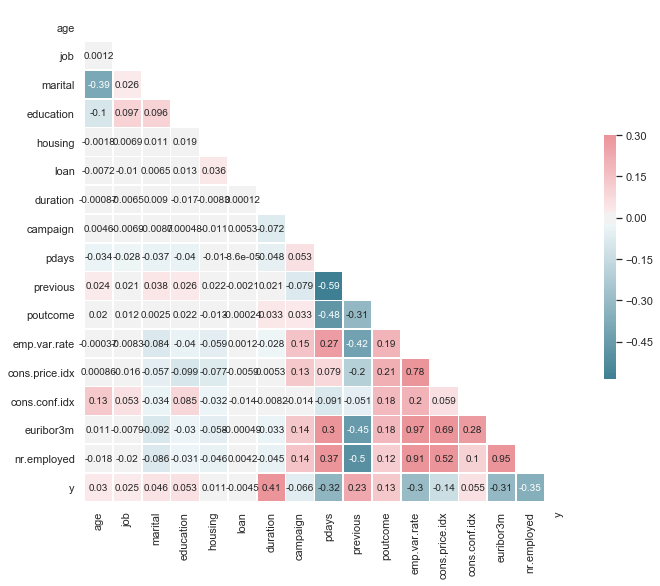

In [37]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [38]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [39]:
data.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [40]:
data.shape

(41188, 15)

#### Train Test split

In [41]:
data.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,1,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
#y=le.fit_transform(y)
X = data.drop(['y'], axis=1)
y = data['y']

In [43]:
print(X.columns)
print(y[0:5])

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


### Train the model

In [44]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
lr=LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predict = lr.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.8986809096058914

In [49]:
print(y_test[0:5])
print('----------------')
print(predict[0:5])

32884    0
3169     0
32206    0
9403     0
14020    0
Name: y, dtype: int64
----------------
[0 0 0 0 0]


In [50]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predict).T, index=['No', 'Yes'], columns=['No', 'Yes']) 
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,10883,1167
Yes,85,222


#### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0) 
rf.fit(X_train, y_train)

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

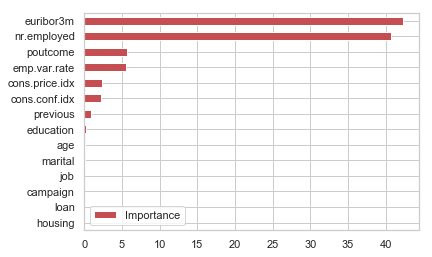

In [52]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [53]:
predict = rf.predict(X_test)

In [54]:
accuracy_score(y_test, predict)

0.8968196164117505

Here we can see that the `euribor`, `# of employees` , `employment variation rate`, `previous outcome` have the most feature importance

In [55]:
# Calculate how many calls were made in total
total_calls = sum(data['campaign'])
print(total_calls)

105754


In [56]:
# how many calls were made after 5th call
extra_calls = data[data['campaign'] > 6]['campaign'].sum() - 6*data[data['campaign']>6].shape[0]

In [57]:
# Calculate reduction in marketing cost
reduction=100*extra_calls/total_calls
print(reduction)

11.384912154622993


In [58]:
# 0 - yes , 1- no
total_sales=float(data[data['y']==0].shape[0])
print(total_sales)

36548.0


In [59]:
less_costly_sales=float(data[(data['campaign'] <= 6) & (data['y']==0)].shape[0])
print(less_costly_sales)

34253.0


In [60]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

93.72058662580716


A reduction of about 11.4% in marketing cost can be achieved while maintaining 93.7% sales if any person is called a maximum of 6 times.    


The objective, is to identify the characteristics of customers who are most likely to subscribe  to term  deposits  of  the  bank. **The customers who subscribed  and  therefore  are  most  likely  to  subscribe**  to  the bank's  term  deposit.  

One observes  that  this  cluster  is  made  of  persons  in  managerial positions who are  married.  

Customers with their level of education being secondary and above, make a good  target  for  direct  marketing  (sale).  

In  addition to this, one observes that this  cluster  represent  those  customers on  whom  the bank  had spent  the  most  ‘talking  time’  i.e.  longer  call  duration (376.685sec) are likely to take the term deposit